In [6]:
# Load the computer network graph dictionary from pickle file
import pickle
pickle_in = open("computer_network_graph.pickle","rb")
computer_network_graph = pickle.load(pickle_in)

In [25]:
# Count nodes and edges in computer_network_graph
n = len(computer_network_graph.keys())
print("nodes = ", n)
connection_sum = 0
for _, val in computer_network_graph.items():
    connection_sum += len(val)
print("sum = ", connection_sum)
num_edges = connection_sum/2
print("edges = ", num_edges)
num_edges = int(num_edges)
print(num_edges)

nodes =  1239
sum =  6094
edges =  3047.0
3047


In [151]:
# Generate ER graph (random undirected graph) with n nodes and probability p of adding an edge between two nodes
import random

def make_ugraph(num_nodes, p):
    
    ugraph = {}
    for node in range(num_nodes):
        ugraph[node] = set([])
        
    total_possible_edges = 0
    for node1 in range(num_nodes):
        for node2 in range(node1+1,num_nodes):
            total_possible_edges += 1
            a = random.random()
            if a < p:
                ugraph[node1].add(node2)
                ugraph[node2].add(node1)
    print("total possible edges = ", total_possible_edges)
    return ugraph

# for n = 1239, total_possible_edges = 766941
# to get num_edges = 3047, set p = m/total_possible_edges
total_possible_edges = 766941
p = num_edges/total_possible_edges
print("p = ", p)
er_graph = make_ugraph(n,p)

er_sum = 0
for _, val in er_graph.items():
    er_sum += len(val)

print("er_sum = ", er_sum)
print("er_edges = ", er_sum/2)

# print(ugraph1)

p =  0.003972926209447663
total possible edges =  766941
er_sum =  6388
er_edges =  3194.0


In [152]:
# Generate UPA graph

# Computer an integer m such that the number of edges in the UPA graph
# is close to the number of edges in the computer network

import alg_upa_trial
import directed_graphs
import math

# dpa code can also be used to make upa graph

# Choose m to be the average number of connections/2 for each node
m = num_edges/n
print("m (raw) = ", m)
m = int(math.ceil(m))
print("m (round int) = ", m)
upa_ugraph = directed_graphs.make_complete_graph(m)
print(upa_ugraph)

upa_trial = alg_upa_trial.UPATrial(m)
print(upa_trial._num_nodes)
print(upa_trial._node_numbers)

for idx in range(m,n):
    new_node_neighbors = upa_trial.run_trial(m)
    upa_ugraph[idx] = new_node_neighbors
    
    for node in new_node_neighbors:
        upa_ugraph[node].add(idx)

upa_sum = 0
for _, val in upa_ugraph.items():
    upa_sum += len(val)
    
print("upa_sum = ", upa_sum)
print("upa_edges = ", upa_sum/2)

m (raw) =  2.4592413236481034
m (round int) =  3
{0: {1, 2}, 1: {0, 2}, 2: {0, 1}}
3
[0, 0, 0, 1, 1, 1, 2, 2, 2]
upa_sum =  7392
upa_edges =  3696.0


In [165]:
m2 = 2;
upa_ugraph2 = directed_graphs.make_complete_graph(m2)
print(upa_ugraph2)

upa_trial2 = alg_upa_trial.UPATrial(m2)
print(upa_trial2._num_nodes)
print(upa_trial2._node_numbers)

for idx in range(m2,n):
    new_node_neighbors = upa_trial2.run_trial(m2)
    upa_ugraph2[idx] = new_node_neighbors
    
    for node in new_node_neighbors:
        upa_ugraph2[node].add(idx)

upa_sum2 = 0
for _, val in upa_ugraph2.items():
    upa_sum2 += len(val)
    
print("upa_sum2 = ", upa_sum2)
print("upa_edges2 = ", upa_sum2/2)

{0: {1}, 1: {0}}
2
[0, 0, 1, 1]
upa_sum2 =  4928
upa_edges2 =  2464.0


In [166]:
def random_order(ugraph):
    """
    Takes a graph and returns a list of the nodes in the graph
    in some random order.
    """
    lst = list(ugraph.keys())
#     print(type(lst))
    random.shuffle(lst)
    
    return lst

# Compute resilience for each of three graphs (computer network, ER, UPA)
import matplotlib.pyplot as plt
import numpy as np

cn_order = random_order(computer_network_graph)
er_order = random_order(er_graph)
upa_order = random_order(upa_ugraph)
upa2_order = random_order(upa_ugraph2)

import connected_components_proj2 as proj2

cn_resilience = proj2.compute_resilience(computer_network_graph, cn_order)
er_resilience = proj2.compute_resilience(er_graph, er_order)
upa_resilience = proj2.compute_resilience(upa_ugraph, upa_order)
upa2_resilience = proj2.compute_resilience(upa_ugraph2, upa2_order)

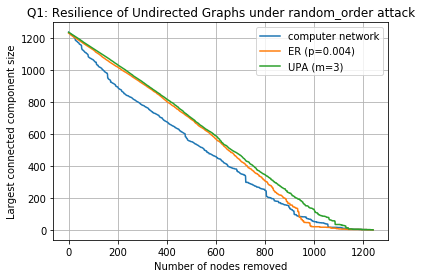

In [258]:
import matplotlib.pyplot as plt
import numpy as np

plt.xlabel('Number of nodes removed')
plt.ylabel('Largest connected component size')
plt.title('Q1: Resilience of Undirected Graphs under random_order attack')
plt.plot(range(len(cn_order)+1),cn_resilience,'-', label='computer network')
plt.plot(range(len(er_order)+1),er_resilience,'-', label='ER (p=0.004)')
# plt.plot(range(len(upa2_order)+1), upa2_resilience,'-', label='UPA (m=2)')
plt.plot(range(len(upa_order)+1), upa_resilience,'-', label='UPA (m=3)')
plt.legend()
plt.grid()
plt.savefig('resilience_random_order_attack.png')
plt.show()

In [174]:
# find largest component size after certain number of nodes removed.

print(cn_resilience[248])
print(er_resilience[248])
print(upa_resilience[248])

835
972
984


### Question 2

Consider removing a significant fraction of the nodes in each graph using `random_order`. We will say that a graph is resilient under this type of attack if the size of its largest connected component is roughly (within ~25%) equal to the number of nodes remaining, after the removal of each node during the attack.

Examine the shape of the three curves from your plot in Question 1. Which of the three graphs are resilient under random attacks as the first 20% of their nodes are removed? Note that there is no need to compare the three curves against each other in your answer to this question.

### Answer

The total number of nodes is n = 1239. After removing 20% of the total nodes (248 nodes), there are 991 nodes remaining. The largest component size for each of the graphs after removing 248 nodes are 835, 972, and 984 for the computer network, ER, and UPA graphs, respectively. A graph is considered resilient if the largest component size is within 25% of the remaining number of nodes, which means the graph should have a component size of at least 743 (75% of 991 nodes). All three graphs have a largest component size within 25% of the number of nodes remaining. Thus, all of the networks are considered resilient to this type of random order attack. The computer network graph appears to be the least resilient of all three graphs.

In [194]:
# Question 3

# Use target_order to compute a node of maximum degree in ugraph. If multiple nodes have the same maximum degree, 
# it chooses any of them (arbitrarily). It then removes that node (and its incident edges) from ugraph.

# The output of target_order is a sequence (list) of nodes that can be used as input to compute_resilience

import alg_application2_provided as alg2

cn_targ_order = alg2.targeted_order(computer_network_graph)
er_targ_order = alg2.targeted_order(er_graph)
upa_targ_order = alg2.targeted_order(upa_ugraph)

# Timer
# start = time.time()
# end = time.time()
# elapsed = start - end

def fast_targeted_order(ugraph):
    n = len(ugraph) # number of nodes in graph
    degree_sets = {} # initialize dictionary
    for k in range(n):
        degree_sets[k] = set()
    
    for i in range(n):
        d = len(ugraph[i])
        degree_sets[d].add(i)
        
    L = [] # initialize empty list
#     i = 0
    
    new_graph = alg2.copy_graph(ugraph)
    
    for k in range(n-1,-1,-1):
        while len(degree_sets[k]) > 0:
            node = degree_sets[k].pop()
            
            for neighbor in new_graph[node]:
#                 print(neighbor)
                d = len(new_graph[neighbor])
#                 print(d)
#                 print(degree_sets[d])
                degree_sets[d].discard(neighbor)
                degree_sets[d-1].add(neighbor)
                new_graph[neighbor].discard(node)
#             print(i)
            L.append(node)
#             i = i + 1
            new_graph.pop(node, None)
    
    return L

upa_fast_targ_order = fast_targeted_order(upa_ugraph)


In [232]:
# Run these two functions on a sequence of UPA graphs with n in range(10, 1000, 10) and m = 5
m_test = 5
targ_order_times = []
fast_targ_order_times = []
import time

for n in range(10, 1000, 10):
# for n in [10, 20]:
    
    upa_graph_test = directed_graphs.make_complete_graph(m_test)
    upa_trial_test = alg_upa_trial.UPATrial(m_test)
    
    for idx in range(m_test,n):
        new_node_neighbors = upa_trial_test.run_trial(m_test)
        upa_graph_test[idx] = new_node_neighbors
    
        for node in new_node_neighbors:
            upa_graph_test[node].add(idx)
    
#     print(upa_graph_test)
    
    # Compare the running time of targeted_order and fast_target_order
    start = time.time()
    test_targ_order = alg2.targeted_order(upa_graph_test)
    end = time.time()
#     print(test_targ_order)
    run_time = end - start
    targ_order_times.append(run_time)
#     print(run_time)
    
    start = time.time()
    test_fast_targ_order = fast_targeted_order(upa_graph_test)
    end = time.time()
#     print(test_fast_targ_order)
    run_time = end - start
    fast_targ_order_times.append(run_time)
#     print(run_time)

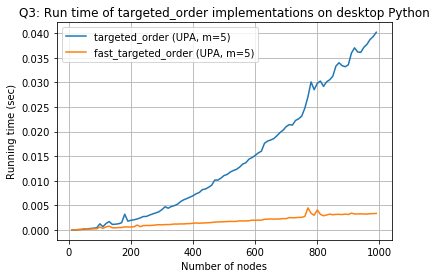

In [261]:
# Plot the results
# n_sq = [4e-8*n*n for n in range(10,1000,10)]
plt.xlabel('Number of nodes')
plt.ylabel('Running time (sec)')
plt.title('Q3: Run time of targeted_order implementations on desktop Python')
plt.plot(range(10,1000,10),targ_order_times,'-', label='targeted_order (UPA, m=5)')
plt.plot(range(10,1000,10),fast_targ_order_times,'-', label='fast_targeted_order (UPA, m=5)')
# plt.plot(range(10,1000,10), n_sq, '-', label='n^2')
plt.legend()
plt.grid()
plt.savefig('run_time_targeted_order.png')
plt.show()

### Question 3

1) Tight upper bounds on the worst-case running times of targeted_order and fast_targeted_order are $O(n^2)$ and $O(n)$ respectively.


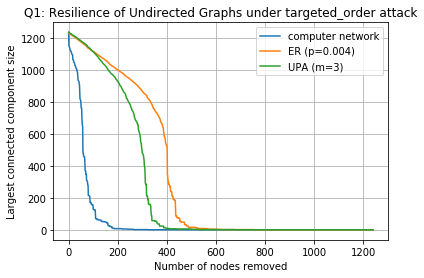

In [253]:
# Question 4

cn_targ_resilience = proj2.compute_resilience(computer_network_graph, cn_targ_order)
er_targ_resilience = proj2.compute_resilience(er_graph, er_targ_order)
upa_targ_resilience = proj2.compute_resilience(upa_ugraph, upa_targ_order)

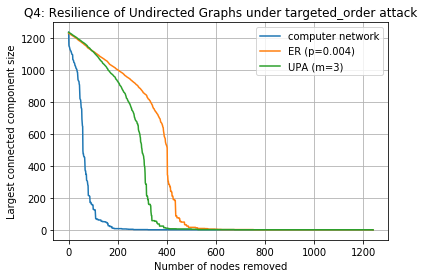

In [256]:
plt.xlabel('Number of nodes removed')
plt.ylabel('Largest connected component size')
plt.title('Q4: Resilience of Undirected Graphs under targeted_order attack')
plt.plot(range(len(cn_order)+1),cn_targ_resilience,'-', label='computer network')
plt.plot(range(len(er_order)+1),er_targ_resilience,'-', label='ER (p=0.004)')
# plt.plot(range(len(upa2_order)+1), upa2_resilience,'-', label='UPA (m=2)')
plt.plot(range(len(upa_order)+1), upa_targ_resilience,'-', label='UPA (m=3)')
plt.legend()
plt.grid()
plt.savefig('resilience_targeted_order_attack.png')
plt.show()

### Question 5

Now, consider removing a significant fraction of the nodes in each graph using `targeted_order`. Examine the shape of the three curves from your plot in Question 4. Which of the three graphs are resilient under targeted attacks as the first 20% of their nodes are removed? Again, note that there is no need to compare the three curves against each other in your answer to this question.

### Answer

The total number of nodes is n = 1239. After removing 20% of the total nodes (248 nodes), there are 991 nodes remaining. The largest component size for each of the graphs after removing 248 nodes are 4, 948, and 791 for the computer network, ER, and UPA graphs, respectively. A graph is considered resilient if the largest component size is within 25% of the remaining number of nodes, which means the graph should have a component size of at least 743 (75% of 991 nodes). For the computer network graph, the largest connected component size is 4 so it is not considered to be resilient. For the ER graph, the largest connected component size is 948 so it is considered to be resilient. For the UPA graph, the largest connected component size is 791 so it also considered to be resilient. 


In [257]:
# find largest component size after certain number of nodes removed.

print(cn_targ_resilience[248])
print(er_targ_resilience[248])
print(upa_targ_resilience[248])

4
948
791


### Question 6

An increasing number of people with malevolent intent are interested in disrupting computer networks. If you found one of the two random graphs to be more resilient under targeted attacks than the computer network, do you think network designers should always ensure that networks' topologies follow that random model? Think about the considerations that one might have to take into account when designing networks and provide a short explanation for your answer.

### Answer

